In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
temp_max=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [3]:
temp_min=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])


In [4]:
months=np.arange(12)

Text(0.5, 1.0, 'Temperature in a City')

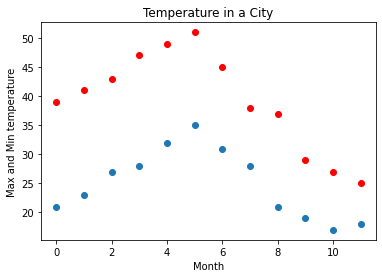

In [5]:
plt.plot(months,temp_min,'o')
plt.plot(months,temp_max,'ro')
plt.xlabel('Month')
plt.ylabel('Max and Min temperature')
plt.title('Temperature in a City')

In [6]:
#........Fitting it to a periodic function

In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

In [8]:
#.....plot the fit

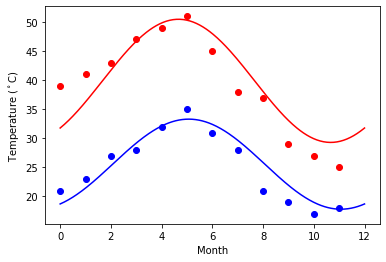

In [9]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [10]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic=pd.read_csv(url)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [11]:
#..1..Create a pie chart presenting the male/female proportion

In [12]:
titanic.groupby('sex').agg({'ticket':'count'})

,ticket
sex,
female,466
male,843


In [18]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1bdabb2eca0>,
 [Text(0.5682617493543037, 1.1692213580929776, 'Female'),
  Text(-0.5245494081458817, -1.0792812045124318, 'Male')],
 [Text(0.3496995380641869, 0.7195208357495246, '35.6%'),
  Text(-0.30598715475176425, -0.6295807026322517, '64.4%')])

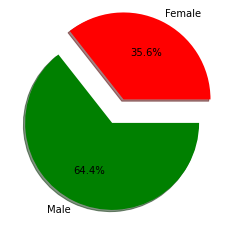

In [13]:
labels=['Female','Male']
sizes=[466,843]
explode=[0.2,0.1]
colors=['r','g']
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True,colors=colors)

In [14]:
#...2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [15]:
columns_select=['fare','age','sex']
tit1=titanic[columns_select]

In [16]:
tit1=tit1.dropna()
tit1

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female
...,...,...,...
1301,7.2250,45.5000,male
1304,14.4542,14.5000,female
1306,7.2250,26.5000,male
1307,7.2250,27.0000,male


Text(0.5, 1.0, 'Male : Red  Female:Green')

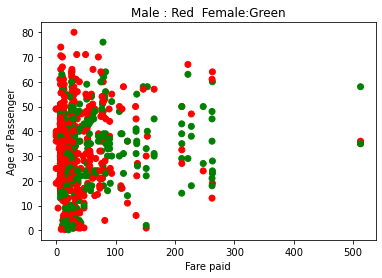

In [17]:
colors = {'male':'red', 'female':'green'}
plt.scatter(x=tit1.fare,y=tit1.age,c=tit1['sex'].apply(lambda x: colors[x]))
plt.xlabel('Fare paid')
plt.ylabel('Age of Passenger')
plt.title('Male : Red  Female:Green')